In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, uniform
import pandas as pd

n_samples = 1000
n_runs = 100

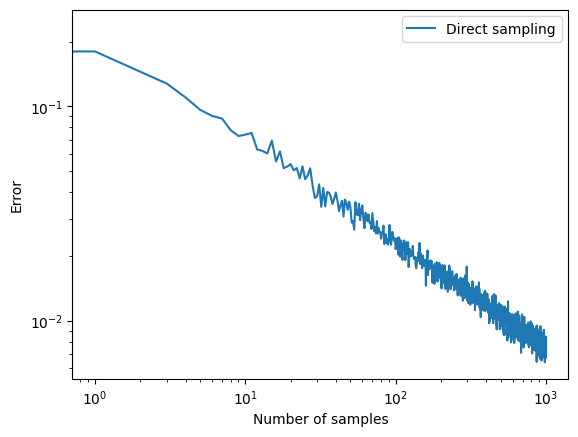

Variance of the direct sampling method:  0.08815391871940054
Estimation of the mean:  0.08815391871940054


In [8]:
# Direct sampling
error_direct = np.zeros(n_samples)
for i in range(n_runs):
    for n in range(1, n_samples + 1):
        x = np.random.uniform(0, 1, n)
        y = x ** 2
        error_direct[n - 1] += np.abs(np.mean(y) - 1 / 3)
error_direct /= n_runs
plt.loglog(error_direct, label='Direct sampling')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Compute of the variance with this method
x = np.random.uniform(0, 1, n_samples*10)
y = x ** 2
var_direct = np.mean((y - 1/3)**2)
mean_direct = np.mean(var_direct)
print('Variance of the direct sampling method: ', var_direct)
print('Estimation of the mean: ', mean_direct)


/var/folders/bd/rn8my1zs30g5ml3258f07ft80000gn/T/ipykernel_14871/1509025107.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = np.cov(x, y)[0, 1] / np.var(x)


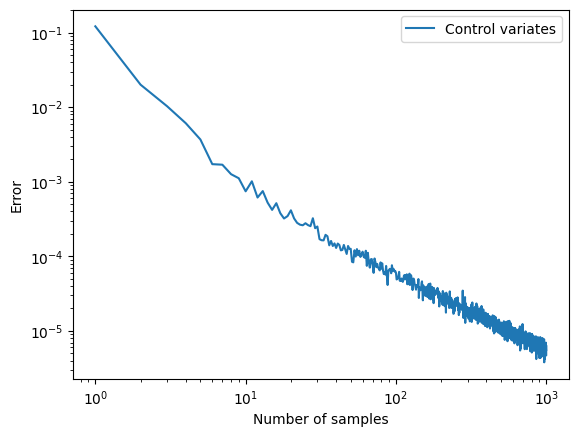

Variance of the control variates method:  0.09156817707598731
Estimation of the mean:  0.3427417595449447


In [9]:
# Control variates
n_samplews = 10000
error_control = np.zeros(n_samples, dtype=float)
for i in range(n_runs):
    for n in range(1, n_samples + 1):
        x = np.random.uniform(0, 1, n)
        y = x ** 2 
        c = np.cov(x, y)[0, 1] / np.var(x)
        adjusted_estimate = np.mean(y + c*(0.5 - np.mean(x))) 
        error_control[n - 1] += (adjusted_estimate - 1 / 3)**2
error_control /= n_runs

# Plot the results
plt.loglog(error_control, label='Control variates')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Compute of the variance with this method
x = np.random.uniform(0, 1, n_samples*10)
y = x ** 2
c = - np.cov(x, y)[0, 1] / np.var(x)
control_variate = y + c*(0.5 - np.mean(x))
# var(control_variate) = var(y) - cov(x, y)**2 / var(x)
var_control = np.mean(control_variate**2) - np.mean(control_variate)**2
mean_control = np.mean(control_variate)
print('Variance of the control variates method: ', var_control)
print('Estimation of the mean: ', mean_control)

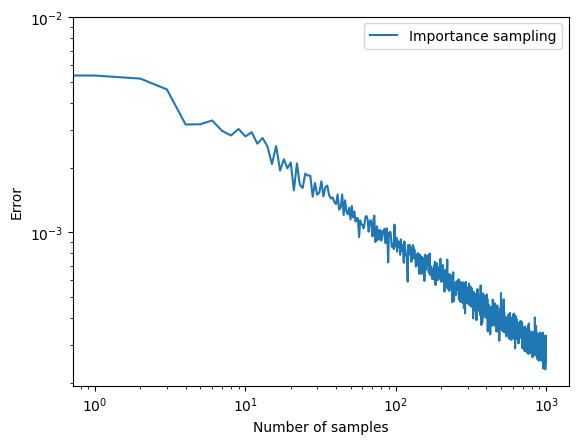

Variance of the importance sampling method:  0.00012147565254640847
Estimation of the mean:  0.3335385278230974


In [10]:
# Importance sampling
error_importance = np.zeros(n_samples, dtype=float)
a, b = 2.9, 1
for i in range(n_runs):
    for n in range(1, n_samples + 1):
        x = beta.rvs(a, b, size=n)
        y = x ** 2 / beta.pdf(x, a, b)
        error_importance[n - 1] += np.abs(np.mean(y) - 1 / 3)
error_importance /= n_runs

# Plot the results
plt.loglog(error_importance, label='Importance sampling')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Compute of the variance with this method
x = beta.rvs(a, b, size=n_samples*10)
y = x ** 2 / beta.pdf(x, a, b)
var_importance = np.mean((y - 1/3)**2)
mean_importance = np.mean(y)
print('Variance of the importance sampling method: ', var_importance)
print('Estimation of the mean: ', mean_importance)

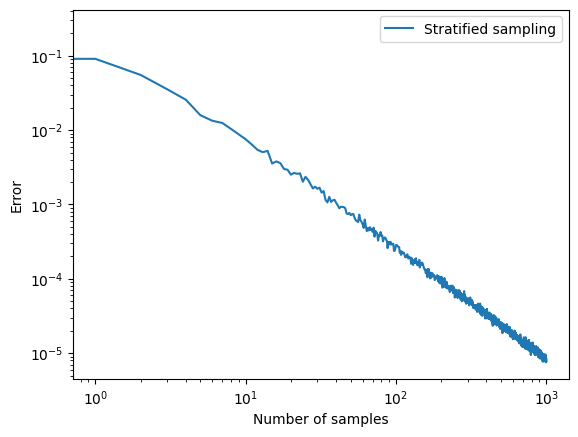

[6.10797190e-05 1.45100093e-04 2.27821050e-04 ... 9.99744142e-01
 9.99812737e-01 9.99968354e-01]
Variance of the stratified sampling method:  0.0888890342457187
Estimation of the mean:  0.33333351526421756


In [11]:
# Stratified sampling
error_stratified = np.zeros(n_samples, dtype=float)
for i in range(n_runs):
    for n in range(1, n_samples + 1):
        strata = np.linspace(0, 1, n + 1)
        x = np.random.uniform(strata[:-1], strata[1:])
        y = x ** 2
        error_stratified[n - 1] += np.abs(np.mean(y) - 1 / 3)
error_stratified /= n_runs

# Plot the results
plt.loglog(error_stratified, label='Stratified sampling')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Compute of the variance with this method
strata = np.linspace(0, 1, n_samples*10 + 1)
x = np.random.uniform(strata[:-1], strata[1:])
print(x)
y = x ** 2
var_stratified = np.mean((y - 1/3)**2)
mean_stratified = np.mean(y)
print('Variance of the stratified sampling method: ', var_stratified)
print('Estimation of the mean: ', mean_stratified)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


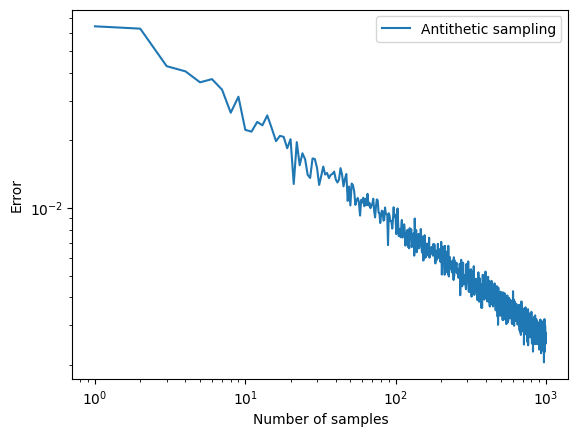

Variance of the antithetic sampling method:  0.09002469633155738
Estimation of the mean:  0.3343663438948038


In [12]:
# Antithetic sampling
error_antithetic = np.zeros(n_samples, dtype=float)
for i in range(n_runs):
    for n in range(1, n_samples + 1):
        u = np.random.uniform(0, 1, n // 2)  
        x = np.concatenate((u, 1 - u)) 
        y = x ** 2
        error_antithetic[n - 1] += np.abs(np.mean(y) - 1 / 3)
error_antithetic /= n_runs

# Plot the results
plt.loglog(error_antithetic, label='Antithetic sampling')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Compute of the variance with this method
u = np.random.uniform(0, 1, n_samples * 5)  # Generate half n_samples*10 variates
x = np.concatenate((u, 1 - u))  # Use antithetic variates
y = x ** 2
var_antithetic = np.mean((y - 1/3)**2)
mean_antithetic = np.mean(y)
print('Variance of the antithetic sampling method: ', var_antithetic)
print('Estimation of the mean: ', mean_antithetic)


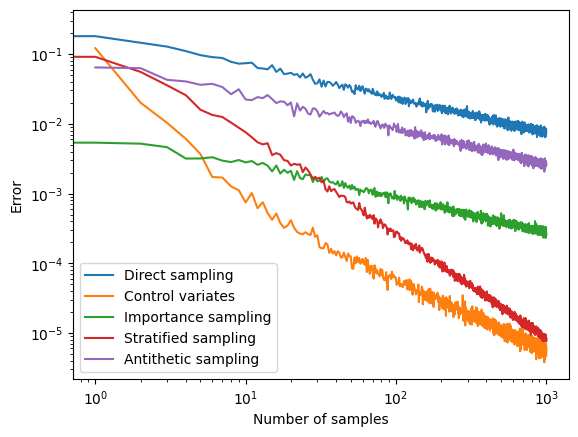

[0.24517941461393278, 0.009408426211611365, 0.00020519448976408228, 1.8193088424656167e-07, 0.001033010561470482]
Variance and mean of each method using pandas: 


,Variance,Mean,Error
Direct,0.088154,0.088154,2.451794e-01
Control,0.091568,0.342742,9.408426e-03
Importance,0.000121,0.333539,2.051945e-04
Stratified,0.088889,0.333334,1.819309e-07
Antithetic,0.090025,0.334366,1.033011e-03


In [13]:
# Plot the results
plt.loglog(error_direct, label='Direct sampling')
plt.loglog(error_control, label='Control variates')
plt.loglog(error_importance, label='Importance sampling')
plt.loglog(error_stratified, label='Stratified sampling')
plt.loglog(error_antithetic, label='Antithetic sampling')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.show()

# Create a table with the variance and mean of each method
variance = [var_direct, var_control, var_importance, var_stratified, var_antithetic]
mean = [mean_direct, mean_control, mean_importance, mean_stratified, mean_antithetic]
error = [np.abs(mean_direct-1/3), np.abs(mean_control-1/3), np.abs(mean_importance-1/3), np.abs(mean_stratified-1/3), np.abs(mean_antithetic-1/3)]

print(error)

table = np.zeros((5, 3))
table[:, 0] = variance
table[:, 1] = mean
table[:, 2] = error
print('Variance and mean of each method using pandas: ')
pd.DataFrame(table, columns=['Variance', 'Mean', 'Error'], index=['Direct', 'Control', 'Importance', 'Stratified', 'Antithetic'])


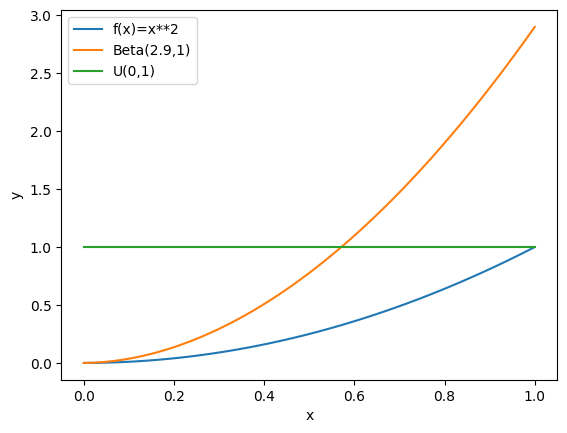

In [14]:
# Plot of Beta(4,2) and y=x**2
x = np.linspace(0, 1, 100)
y = x ** 2
plt.plot(x, y, label='f(x)=x**2')
plt.plot(x, beta.pdf(x, 2.9, 1), label='Beta(2.9,1)')
plt.plot(x, uniform.pdf(x,0,1), label='U(0,1)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()